In [37]:
import random
import tempfile
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from datasetsforecast.m4 import M4
from utilsforecast.plotting import plot_series

from mlforecast import MLForecast
from mlforecast.target_transforms import Differences



In [5]:
await M4.async_download('data')

INFO:datasetsforecast.utils:Downloaded: Other-train.csv
INFO:datasetsforecast.utils:Downloaded: Other-test.csv
INFO:datasetsforecast.utils:Downloaded: Daily-test.csv
INFO:datasetsforecast.utils:Downloaded: Yearly-test.csv
INFO:datasetsforecast.utils:Downloaded: Weekly-test.csv
INFO:datasetsforecast.utils:Downloaded: Monthly-test.csv
INFO:datasetsforecast.utils:Downloaded: Yearly-train.csv
INFO:datasetsforecast.utils:Downloaded: Quarterly-test.csv
INFO:datasetsforecast.utils:Downloaded: Weekly-train.csv
INFO:datasetsforecast.utils:Downloaded: Quarterly-train.csv
INFO:datasetsforecast.utils:Downloaded: Daily-train.csv
INFO:datasetsforecast.utils:Downloaded: Monthly-train.csv


In [10]:
df=pd.read_csv('data/m4/datasets/Hourly-train.csv')
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
409,H410,153.0,196.0,163.0,131.0,82.0,53.0,57.0,54.0,46.0,...,132.0,165.0,191.0,186.0,119.0,108.0,70.0,72.0,79.0,77.0
410,H411,24.0,30.0,22.0,14.0,19.0,20.0,24.0,45.0,38.0,...,122.0,195.0,166.0,154.0,132.0,76.0,66.0,67.0,51.0,42.0
411,H412,19.0,30.0,12.0,16.0,13.0,15.0,15.0,21.0,21.0,...,111.0,166.0,225.0,278.0,144.0,71.0,70.0,73.0,39.0,36.0
412,H413,21.0,16.0,17.0,19.0,16.0,22.0,21.0,15.0,23.0,...,77.0,91.0,76.0,68.0,68.0,59.0,58.0,53.0,38.0,46.0
413,H414,15.0,13.0,13.0,16.0,26.0,51.0,91.0,103.0,106.0,...,89.0,117.0,128.0,105.0,65.0,48.0,41.0,35.0,26.0,17.0


In [11]:
await M4.async_download('data', group='Hourly')

In [83]:
df, *_ = M4.load('data', 'Hourly')
uids = df['unique_id'].unique()
random.seed(0)
sample_uids = random.choices(uids, k=6)
df = df[df['unique_id'].isin(sample_uids)].reset_index(drop=True)
df['ds'] = df['ds'].astype('int64')
df.shape

(5528, 3)

In [126]:
df['unique_id'].dtype

dtype('O')

In [127]:
df.head(49)


,unique_id,ds,y
0,H196,1,11.8
1,H196,2,11.4
2,H196,3,11.1
3,H196,4,10.8
4,H196,5,10.6
5,H196,6,10.3
6,H196,7,10.1
7,H196,8,10.6
8,H196,9,12.5
9,H196,10,14.4


In [50]:
# df[df['unique_id']=="H196"].head(50)

In [52]:
fcst = MLForecast(
    models=[],  # we're not interested in modeling yet
    freq=1,  # our series have integer timestamps, so we'll just add 1 in every timestep
    target_transforms=[Differences([24])],
)
prep = fcst.preprocess(df)
prep.head()
# prep[prep['unique_id']=="H196"].head(24)

,unique_id,ds,y
24,H196,25,0.3
25,H196,26,0.3
26,H196,27,0.1
27,H196,28,0.2
28,H196,29,0.2


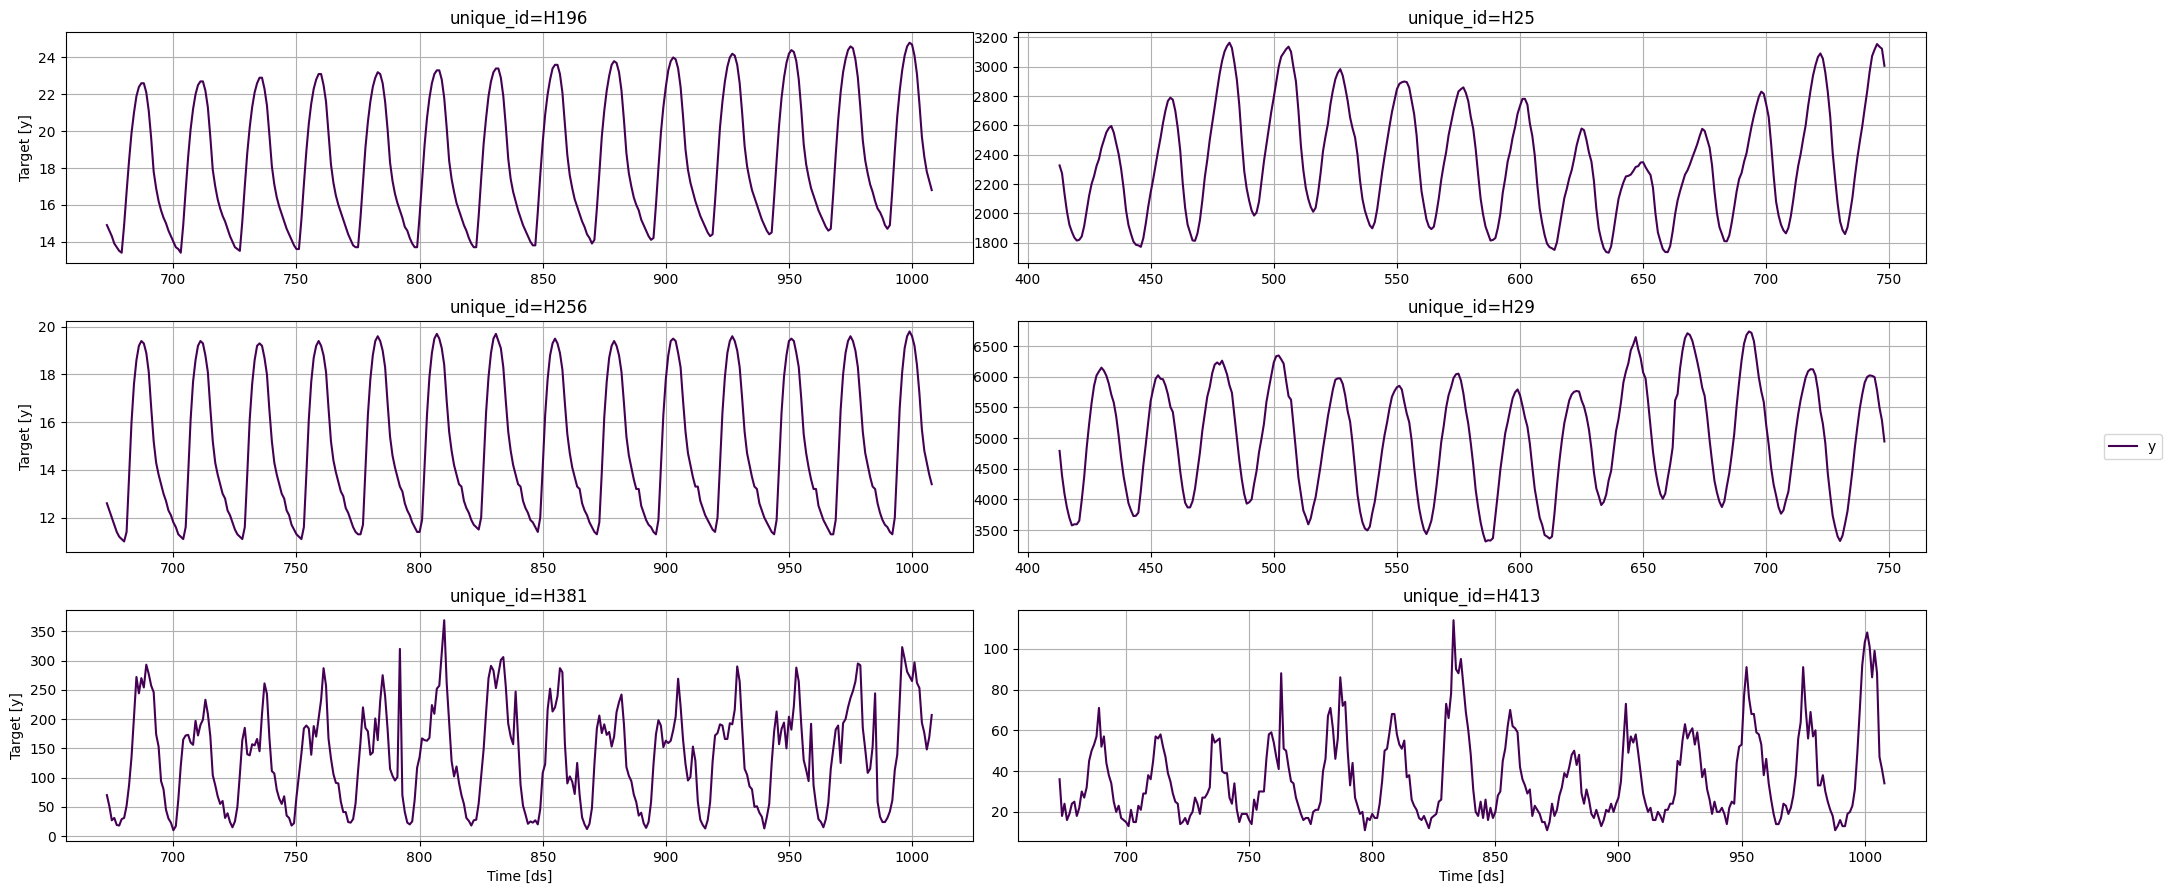

In [57]:
plot_series(df, max_insample_length=24 * 14)

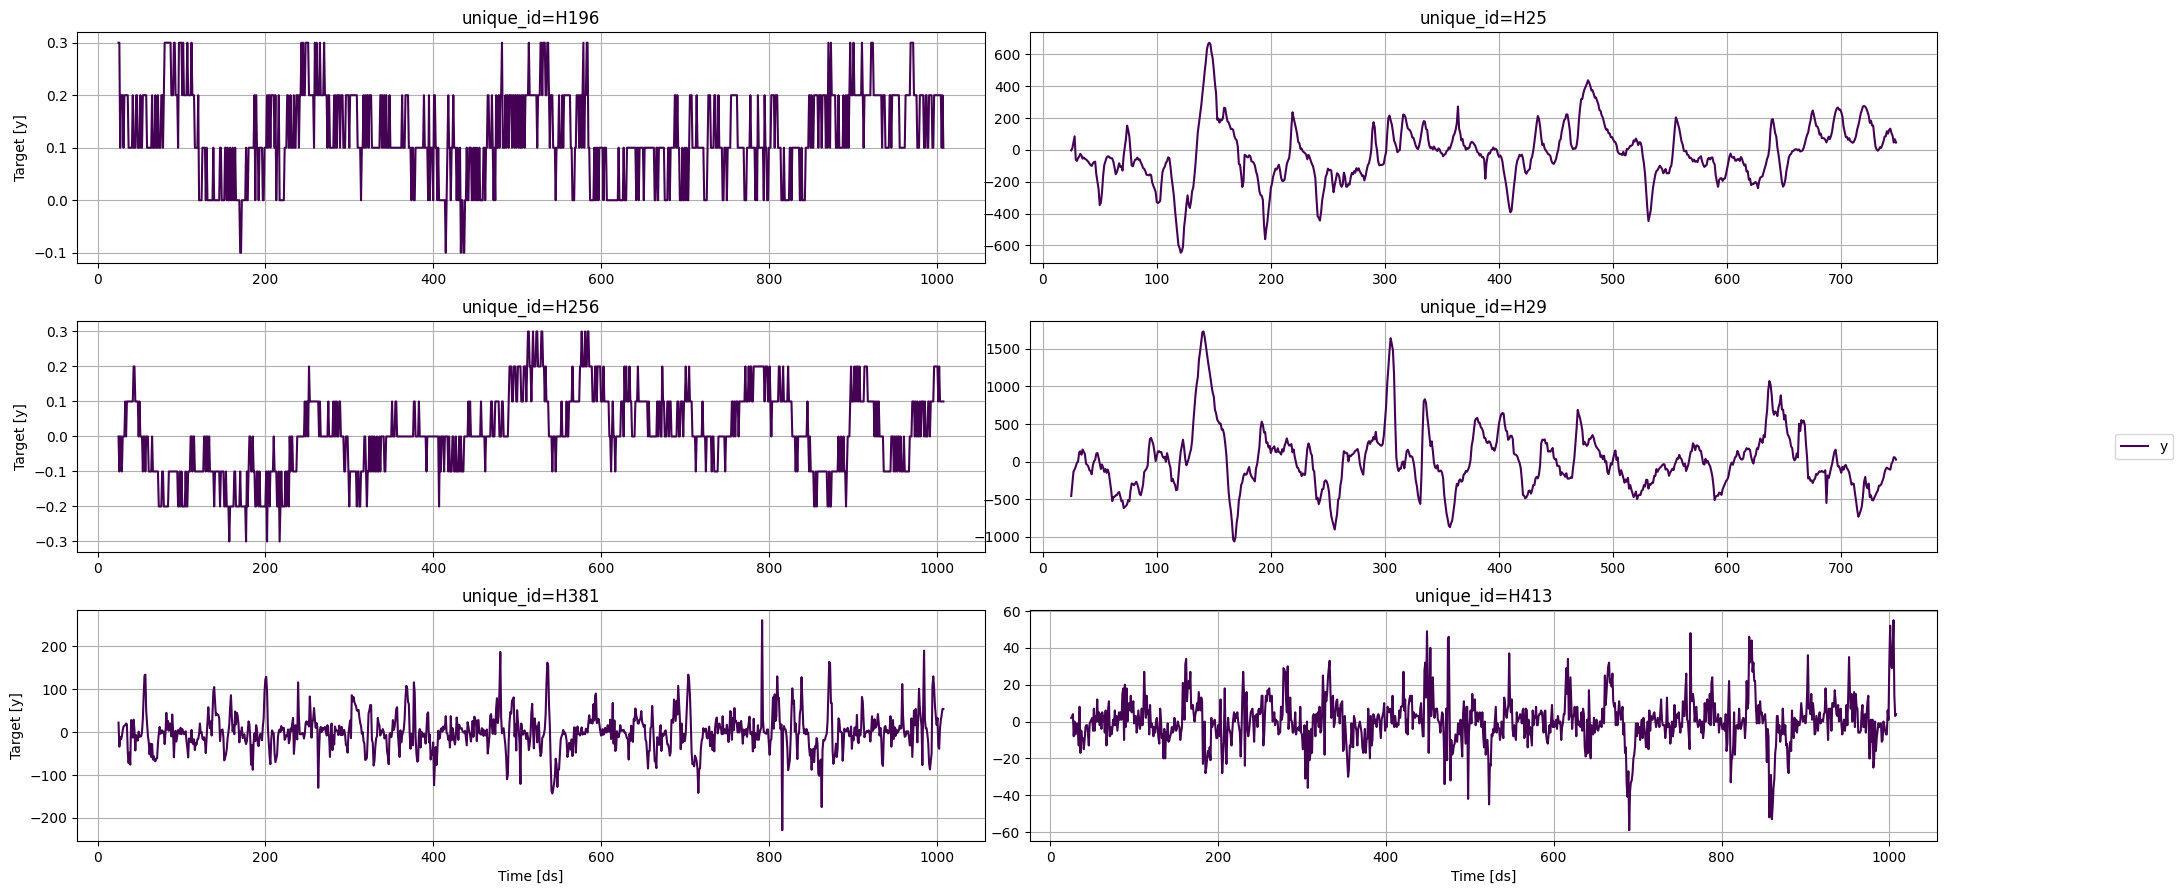

In [55]:
plot_series(prep)

In [65]:
prep.head()

,unique_id,ds,y,lag1,lag24,expanding_mean_lag1,rolling_mean_lag24_window_size48,rolling_mean_48_lag24
95,H196,96,0.1,0.2,0.2,0.174648,0.150000,0.150000
96,H196,97,0.3,0.1,0.1,0.173611,0.145833,0.145833
97,H196,98,0.3,0.3,0.1,0.175342,0.141667,0.141667
98,H196,99,0.3,0.3,0.1,0.177027,0.141667,0.141667
99,H196,100,0.3,0.3,0.2,0.178667,0.141667,0.141667


In [58]:
fcst=MLForecast(
    models=[],
    freq=1,
    lags=[1,24],
    target_transforms=[Differences([24])],
)
prep=fcst.preprocess(df)
prep

,unique_id,ds,y,lag1,lag24
48,H196,49,0.1,0.1,0.3
49,H196,50,0.1,0.1,0.3
50,H196,51,0.2,0.1,0.1
51,H196,52,0.1,0.2,0.2
52,H196,53,0.1,0.1,0.2
...,...,...,...,...,...
5523,H413,1004,39.0,29.0,1.0
5524,H413,1005,55.0,39.0,-25.0
5525,H413,1006,14.0,55.0,-20.0
5526,H413,1007,3.0,14.0,0.0


In [60]:
prep.drop(columns=['unique_id','ds']).corr()['y']

y        1.000000
lag1     0.967326
lag24   -0.143246
Name: y, dtype: float64

In [63]:
from mlforecast.lag_transforms import ExpandingMean, RollingMean
from numba import njit
from window_ops.rolling import rolling_mean

@njit
def rolling_mean_48(x):
    return rolling_mean(x, 48)
fcst=MLForecast(
    models=[],
    freq=1,
    lags=[1,24],
    target_transforms=[Differences([24])],
    lag_transforms={
        1:[ExpandingMean()], 
        24:[RollingMean(window_size=48),rolling_mean_48]
    },   
)
prep=fcst.preprocess(df)
prep

,unique_id,ds,y,lag1,lag24,expanding_mean_lag1,rolling_mean_lag24_window_size48,rolling_mean_48_lag24
95,H196,96,0.1,0.2,0.2,0.174648,0.150000,0.150000
96,H196,97,0.3,0.1,0.1,0.173611,0.145833,0.145833
97,H196,98,0.3,0.3,0.1,0.175342,0.141667,0.141667
98,H196,99,0.3,0.3,0.1,0.177027,0.141667,0.141667
99,H196,100,0.3,0.3,0.2,0.178667,0.141667,0.141667
...,...,...,...,...,...,...,...,...
5523,H413,1004,39.0,29.0,1.0,0.242084,3.437500,3.437500
5524,H413,1005,55.0,39.0,-25.0,0.281633,2.708333,2.708333
5525,H413,1006,14.0,55.0,-20.0,0.337411,2.125000,2.125000
5526,H413,1007,3.0,14.0,0.0,0.351324,1.770833,1.770833


In [66]:
def hour_index(times):
    return times % 24

fcst = MLForecast(
    models=[],
    freq=1,
    target_transforms=[Differences([24])],
    date_features=[hour_index],
)
fcst.preprocess(df)


,unique_id,ds,y,hour_index
24,H196,25,0.3,1
25,H196,26,0.3,2
26,H196,27,0.1,3
27,H196,28,0.2,4
28,H196,29,0.2,5
...,...,...,...,...
5523,H413,1004,39.0,20
5524,H413,1005,55.0,21
5525,H413,1006,14.0,22
5526,H413,1007,3.0,23


In [69]:
from mlforecast.target_transforms import LocalStandardScaler
fcst = MLForecast(
    models=[],
    freq=1,
    lags=[1],
    target_transforms=[LocalStandardScaler()]
)
fcst.preprocess(df)


,unique_id,ds,y,lag1
1,H196,2,-1.493026,-1.383286
2,H196,3,-1.575331,-1.493026
3,H196,4,-1.657635,-1.575331
4,H196,5,-1.712505,-1.657635
5,H196,6,-1.794810,-1.712505
...,...,...,...,...
5523,H413,1004,3.062766,2.425012
5524,H413,1005,2.523128,3.062766
5525,H413,1006,0.511751,2.523128
5526,H413,1007,0.217403,0.511751


In [89]:
from sklearn.base import BaseEstimator

class Naive(BaseEstimator):
    def fit(self, X, y):
        return self

    def predict(self, X):
        return X['lag1']

fcst = MLForecast(
    models=[Naive()],
    freq=1,
    lags=[1],
    target_transforms=[Differences([24])]
)
fcst.fit(df)
preds = fcst.predict(1)
preds


,unique_id,ds,Naive
0,H196,1009,16.3
1,H25,749,2873.0
2,H256,1009,13.3
3,H29,749,4451.0
4,H381,1009,298.0
5,H413,1009,29.0


In [93]:
df[df['unique_id']=='H196'].tail(25)

,unique_id,ds,y
983,H196,984,16.7
984,H196,985,16.2
985,H196,986,15.8
986,H196,987,15.6
987,H196,988,15.3
988,H196,989,14.9
989,H196,990,14.7
990,H196,991,14.9
991,H196,992,16.8
992,H196,993,18.9


In [90]:
df.groupby('unique_id').tail(2)

,unique_id,ds,y
1006,H196,1007,17.3
1007,H196,1008,16.8
1754,H25,747,3121.0
1755,H25,748,3005.0
2762,H256,1007,13.8
2763,H256,1008,13.4
3510,H29,747,5289.0
3511,H29,748,4944.0
4518,H381,1007,169.0
4519,H381,1008,207.0


In [111]:
fcst = MLForecast(
    models=[Naive()],
    freq=1,
    lags=[1],
    target_transforms=[]
)
p=fcst.preprocess(df)
# preds = fcst.predict(1)

fcst.fit(df)
pre=fcst.predict(1)
pre

,unique_id,ds,Naive
0,H196,1009,16.8
1,H25,749,3005.0
2,H256,1009,13.4
3,H29,749,4944.0
4,H381,1009,207.0
5,H413,1009,34.0


In [112]:
p[p['unique_id']=='H196'].tail(25)

,unique_id,ds,y,lag1
983,H196,984,16.7,17.1
984,H196,985,16.2,16.7
985,H196,986,15.8,16.2
986,H196,987,15.6,15.8
987,H196,988,15.3,15.6
988,H196,989,14.9,15.3
989,H196,990,14.7,14.9
990,H196,991,14.9,14.7
991,H196,992,16.8,14.9
992,H196,993,18.9,16.8


In [113]:
import lightgbm as lgb

In [114]:
lgb_params = {
    'verbosity': -1,
    'num_leaves': 512,
}

fcst = MLForecast(
    models={
        'avg': lgb.LGBMRegressor(**lgb_params),
        'q75': lgb.LGBMRegressor(**lgb_params, objective='quantile', alpha=0.75),
        'q25': lgb.LGBMRegressor(**lgb_params, objective='quantile', alpha=0.25),
    },
    freq=1,
    target_transforms=[Differences([24])],
    lags=[1, 24],
    lag_transforms={
        1: [ExpandingMean()],
        24: [RollingMean(window_size=48)],
    },
    date_features=[hour_index],
)
fcst.fit(df)

MLForecast(models=[avg, q75, q25], freq=1, lag_features=['lag1', 'lag24', 'expanding_mean_lag1', 'rolling_mean_lag24_window_size48'], date_features=[<function hour_index at 0x7fd7a6cfe480>], num_threads=1)

In [115]:
preds=fcst.predict(48)

In [116]:
preds

,unique_id,ds,avg,q75,q25
0,H196,1009,16.305600,16.371007,16.287281
1,H196,1010,15.926697,16.000279,15.876143
2,H196,1011,15.714738,15.847777,15.683119
3,H196,1012,15.442004,15.547711,15.401056
4,H196,1013,15.046420,15.145844,15.003620
...,...,...,...,...,...
283,H413,1052,97.459105,115.443361,45.527053
284,H413,1053,90.533842,112.808362,40.850415
285,H413,1054,51.184400,87.944505,19.967593
286,H413,1055,60.716380,74.062872,22.860944


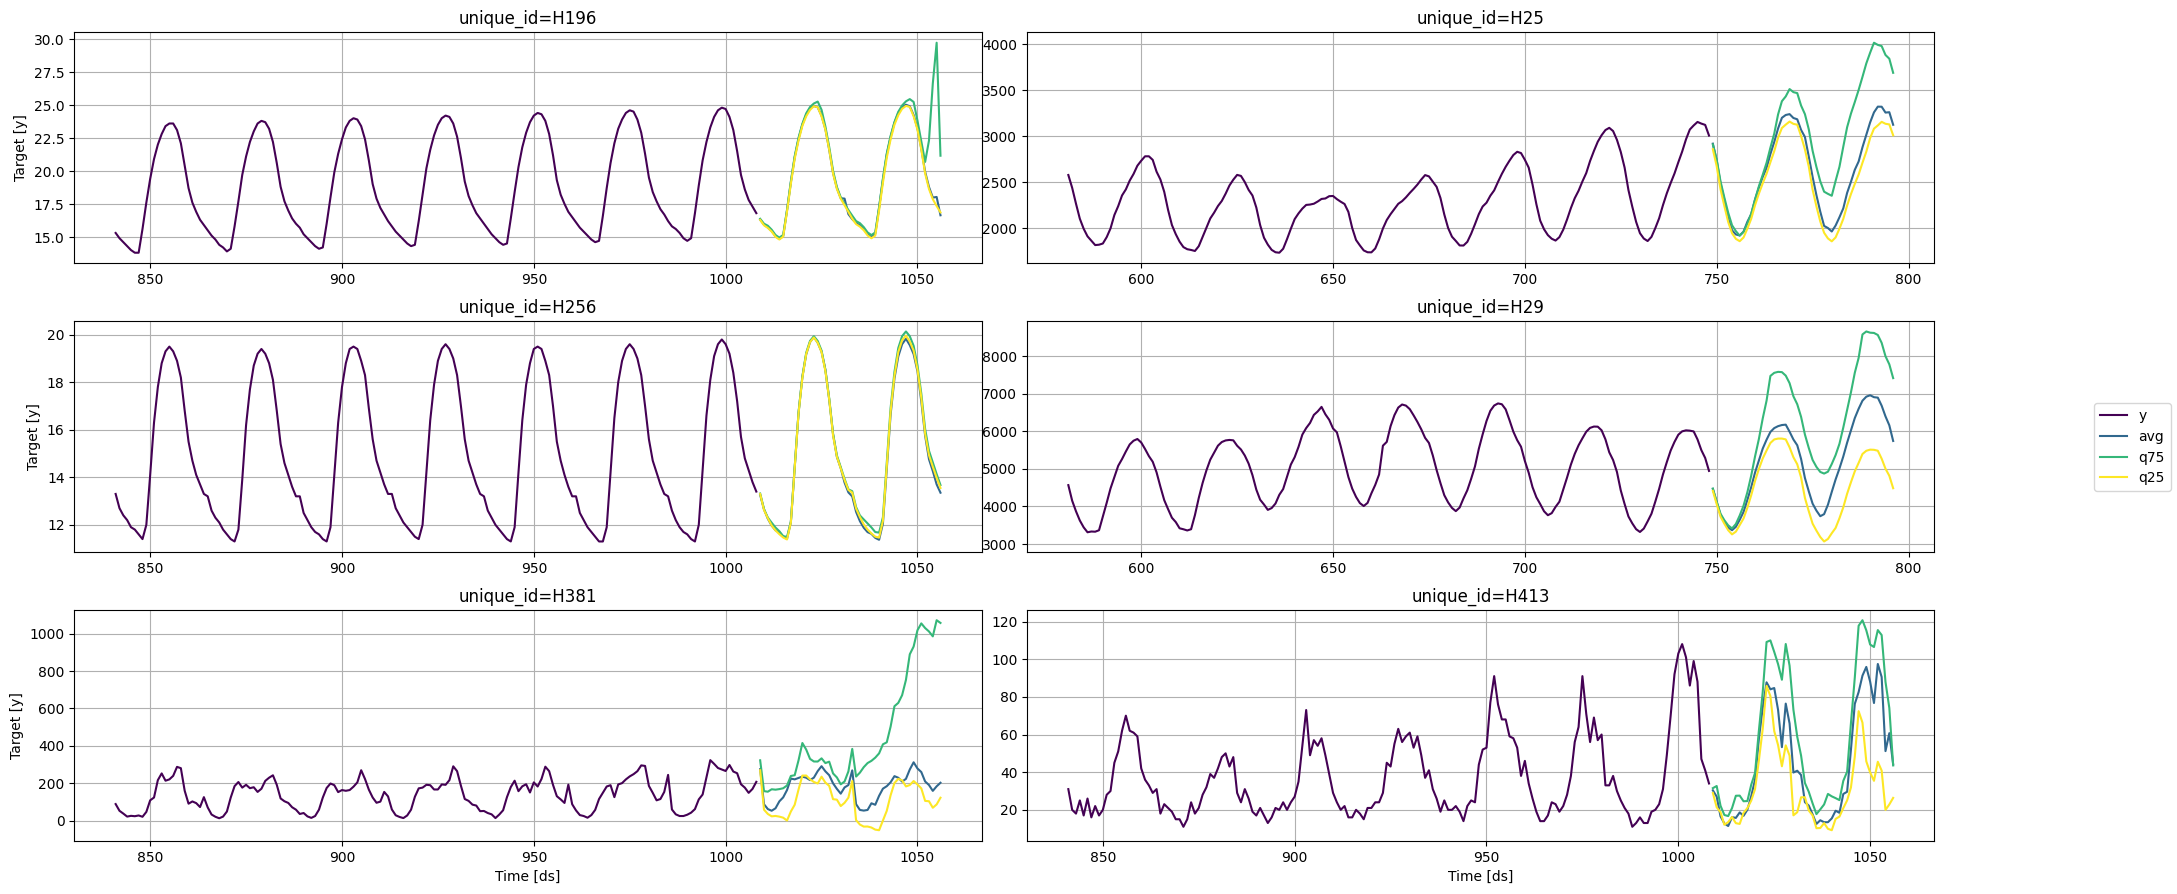

In [117]:
plot_series(df, preds, max_insample_length=24 * 7)


In [122]:
fcst = MLForecast(
    models={
        'avg': lgb.LGBMRegressor(**lgb_params),
        'q75': lgb.LGBMRegressor(**lgb_params, objective='quantile', alpha=0.75),
        'q25': lgb.LGBMRegressor(**lgb_params, objective='quantile', alpha=0.25),
    },
    freq=1,
    target_transforms=[Differences([24])],
    lags=[1, 24],
    lag_transforms={
        1: [ExpandingMean()],
        24: [RollingMean(window_size=48)],
    },
    date_features=[hour_index],
)
cv_result = fcst.cross_validation(
    df,
    n_windows=4,  # number of models to train/splits to perform
    h=48,  # length of the validation set in each window
)



In [124]:
cv_result[cv_result['unique_id']=='H196']

,unique_id,ds,cutoff,y,avg,q75,q25
0,H196,817,816,15.3,15.382113,15.367347,15.299894
1,H196,818,816,14.9,14.920406,14.921654,14.776582
2,H196,819,816,14.6,14.650569,14.724656,14.599421
3,H196,820,816,14.2,14.254727,14.317112,14.171797
4,H196,821,816,13.9,13.959669,14.022089,13.867503
...,...,...,...,...,...,...,...
907,H196,1004,960,19.7,19.570821,19.854728,19.464676
908,H196,1005,960,18.6,18.324406,18.712527,18.356889
909,H196,1006,960,17.8,17.505421,18.060792,17.662120
910,H196,1007,960,17.3,17.509882,17.418143,17.066496
